### *Woodrow Reese*     
#### *HW1*

In [1]:
import numpy as np
import pandas as pd
import math
from collections import Counter

# Question 4

## (a)
-  Fraud detection - classification. Predictors: Purchase history, recipient's info, transaction suze
-  Risk management - classification. Predictors: credit score, debt, cash flow
-  Image classification (medical)
## (b)
- My linear regression model in Question 9. Predicting MPG given car weight.
- Population change over time. Predictors: Rent, income, transportation, crime.
- Home valuation. Predictors: SqFt, land, garage, bathrooms, bedrooms. The response is the estimated value of the home given X
## (c)
- Netflix recommendation system. Recommendations are based on what other people who have watched/liked the same show as you.
- Ad targeting. An audience is targeted based on interests, age, search activity etc. Different ads can catch the eye better given a different audiences.
- Player efficiency rating based on points, points allowed, fouls, turnovers, etc. Players can be classified by their efficiency, allowing to balanced lineups throughout the game.

# Question 6

> A parametric approach relies on assumption about the population:
- It follows a uniform distribution
- The variance of the population is the same over each independent observation

An advantage is that the approach is simpler and generally will not overfit the training data. A disadvantage is that the model is sensitive to the assumptions made, making it inflexible and unfit to find relationships in nonlinear data.

> A non-parametric approach doesn't make assumptions about the population. Random samples are used to make observations about the population. 

An advantage is that the approach is not heavily affected by outliers, allowing for nonlinear data to be a good fit for these models. Variance decreases as the sample size increases and a drawback of this approach is the opposite; the variance of the model will be larger if the sample size is small. 

# Question 7

In [2]:
table = pd.read_csv('./q7Table.csv') 
table

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


# (a)

In [3]:
# if we were to compare to a non-origin point...
# euclidean(p1, p2): array | object, array | object: {
#   return math.sqrt((p1.x1-p2.x1)**2+(p1.x2-p2.x2)**2+(p1.x3-p2.x3)**2)
# }
def euclidean(x1, x2, x3): 
    return math.sqrt(x1**2 + x2**2 + x3**2)

arr = []
for i in range(6): 
    dist = euclidean(table['X1'][i], table['X2'][i], table['X3'][i])
    arr.append((i, dist))
    print(f'Obs: {i+1}, Dist: {dist}')


Obs: 1, Dist: 3.0
Obs: 2, Dist: 2.0
Obs: 3, Dist: 3.1622776601683795
Obs: 4, Dist: 2.23606797749979
Obs: 5, Dist: 1.4142135623730951
Obs: 6, Dist: 1.7320508075688772


In [4]:
prediction = []
def knn(k):
    arr.sort(key=lambda x: x[1]) # Sort by minDist
    knn = arr[:k] # Add the k smallest distances to knn (obs: dist)
    
    # For each correspoinding point, add to prediction and return the points
    for i in range(len(knn)):
        prediction.append(table.iloc[knn[i][0]])
    return prediction

 # My knn function adds duplicates to prediction before returning?
    # knn(3) is of len 4
    # knn(4) is of len 9

# (b) 

In [5]:
knn(1)

[X1       -1
 X2        0
 X3        1
 Y     Green
 Name: 4, dtype: object]

> The prediction is (-1, 0, 1), Green because this is the point closest to the origin

# (c)

In [6]:
knn(3)

[X1       -1
 X2        0
 X3        1
 Y     Green
 Name: 4, dtype: object,
 X1       -1
 X2        0
 X3        1
 Y     Green
 Name: 4, dtype: object,
 X1      1
 X2      1
 X3      1
 Y     Red
 Name: 5, dtype: object,
 X1      2
 X2      0
 X3      0
 Y     Red
 Name: 1, dtype: object]

> The prediction is red because the majority (2/3) of neighbors are colored red. 

# (d)

Given the boundary is highly non-linear, we should expect a small K to be the best fit. Our model is not flexible given the small observation size. 

# Question 9

In [7]:
Auto = pd.read_csv('./Auto.csv')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


# (a)
Qualitative: year, origin, name, cylinders 

Quantitative: mpg, displacement, hp, weight, acceleration

# (b)

In [9]:
quantitative = []
quantitative.append(Auto[['mpg']])
quantitative.append(Auto[['displacement']])
quantitative.append(Auto[['weight']])
quantitative.append(Auto[['acceleration']])

In [10]:
def _range(arr, s): 
    print(f'Range of {s}: [{arr.min()}, {arr.max()}] => {arr.max() - arr.min()}')

_range(Auto['mpg'], 'mpg')
_range(Auto['displacement'], 'displacement')
_range(Auto['weight'], 'weight')
_range(Auto['acceleration'], 'acceleration')

Range of mpg: [9.0, 46.6] => 37.6
Range of displacement: [68.0, 455.0] => 387.0
Range of weight: [1613, 5140] => 3527
Range of acceleration: [8.0, 24.8] => 16.8


# (c)

In [11]:
def _compute(arr, s):
    print(f'{s} => Std:{arr.std():.2f}\tMean:{arr.mean():.2f}')
    
_compute(Auto['mpg'], 'mpg')
_compute(Auto['displacement'], 'displacement')
_compute(Auto['weight'], 'weight')
_compute(Auto['acceleration'], 'acceleration')

mpg => Std:7.83	Mean:23.52
displacement => Std:104.38	Mean:193.53
weight => Std:847.90	Mean:2970.26
acceleration => Std:2.75	Mean:15.56


# (d)

In [12]:
auto = Auto
auto.drop(index=[i for i in range(10,86,1)], inplace=True) 
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           321 non-null    float64
 1   cylinders     321 non-null    int64  
 2   displacement  321 non-null    float64
 3   horsepower    321 non-null    object 
 4   weight        321 non-null    int64  
 5   acceleration  321 non-null    float64
 6   year          321 non-null    int64  
 7   origin        321 non-null    int64  
 8   name          321 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 25.1+ KB


In [13]:
def _range(arr, s): 
    print(f'Range of {s}: [{arr.min()}, {arr.max()}] => {arr.max() - arr.min()}')

_range(auto['mpg'], 'mpg')
_range(auto['displacement'], 'displacement')
_range(auto['weight'], 'weight')
_range(auto['acceleration'], 'acceleration')

Range of mpg: [11.0, 46.6] => 35.6
Range of displacement: [68.0, 455.0] => 387.0
Range of weight: [1649, 4997] => 3348
Range of acceleration: [8.5, 24.8] => 16.3


In [14]:
def _compute(arr, s):
    print(f'{s} => Std:{arr.std():.2f}\tMean:{arr.mean():.2f}')
    
_compute(auto['mpg'], 'mpg')
_compute(auto['displacement'], 'displacement')
_compute(auto['weight'], 'weight')
_compute(auto['acceleration'], 'acceleration')

mpg => Std:7.90	Mean:24.44
displacement => Std:99.86	Mean:187.17
weight => Std:809.64	Mean:2933.18
acceleration => Std:2.71	Mean:15.71


# (e)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

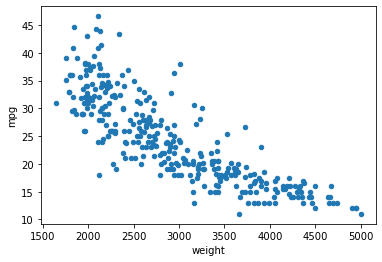

In [15]:
Auto.plot.scatter(x='weight',y='mpg')

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
  

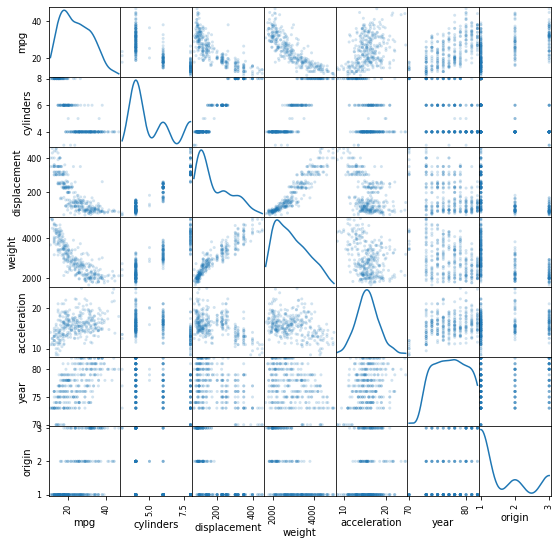

In [16]:
pd.plotting.scatter_matrix(Auto, alpha=0.2, figsize=(9,9), diagonal='kde')

<AxesSubplot:>

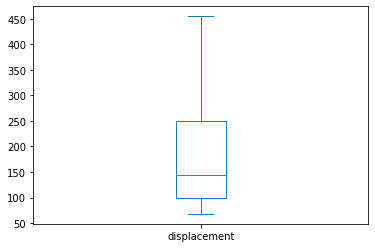

In [17]:
Auto['displacement'].plot.box()

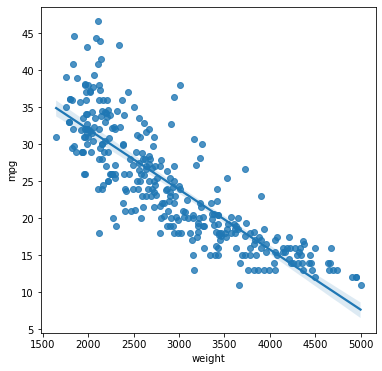

In [18]:
# Linear regression model: train weight v mpg
# Intercept: 48.306516:.06f  Coefficient: -0.008315:.06f
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

X = Auto['weight'].values.reshape(-1,1)
y = Auto['mpg']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(6,6))
sns.regplot(data=Auto, x='weight', y='mpg')
plt.show()


In [19]:
## Prediction: 4000lb car gets ~15.8mpg
model.predict(np.array([2000]).reshape(1,-1))


## Prediction: 2000lb car gets ~32mpg
model.predict(np.array([2000]).reshape(1,-1))

array([32.03637571])

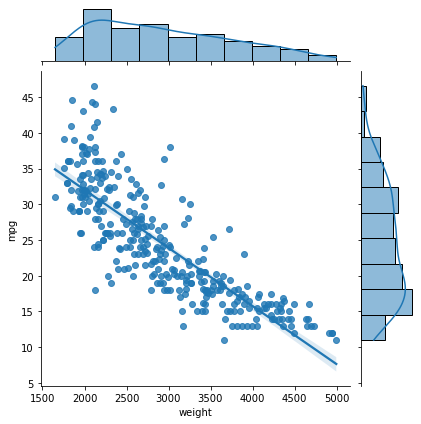

In [150]:
sns.jointplot(data=Auto, x='weight', y='mpg', kind='reg', height=6)
plt.show()